## Data fitting

As you may have noticed from your labs the world works a bit different from the textbook. In textbooks you are usually asked to predict what your reactor will give you if you know the rate of the reaction. In real world, sometimes we want to estimate the rate of the reaction by running the experiment and analyzing the concentrations. To do that we need to learn how to fit our data. 

Hopefully, you are already persuaded and eager to learn how to use Python to fit your data, if not - please go back to the Dr. Yadav's Lecture 8.

So the here is the problem we want to solve:

You and your friend have an assignment from your boss to analyze how fast a secret chemical $A$ can react into another secret chemical $B$. 

$$A \to B$$

You and your buddy have run an experiment for the reaction in a batch reactor and got this data points below. We assume your friend likes Python as much as you do and as a good friend he has imported everything into Python arrays.

```python
time_array = array([   0.,  125.,  250.,  375.,  500.,  625.,  750.,  875., 1000.,
       1125., 1250., 1375., 1500., 1625., 1750., 1875., 2000., 2125.,
       2250., 2375., 2500., 2625., 2750., 2875.])
       
C_A_array = array([10.28148623,  8.92676003,  7.47370739,  7.20498621,  6.01448975,
        4.85174028,  4.68868558,  4.01410753,  3.94055544,  3.04186757,
        2.40544184,  2.62290428,  2.18704979,  1.31502537,  1.03730156,
        2.28837979,  0.45062549,  1.43886825,  1.26808295,  1.24125421,
        0.28353151,  0.90117414,  0.74132173,  0.73710597])
```

You know that `time_array` corresponds to time and `C_A_array` to $C_A(t)$.

You also know that it is the first order reaction, i.e:

$-r_A = k C_A$

Now $\dfrac{d C_A}{dt} = - k C_A$ and the solution is $C_A(t) = C_{A0} \cdot e^{-k t}$

Your boss says that you and your friend need to give him a reaction constant $k$ otherwise your whole company won't be able to deliver a new product and will experience significant difficulties (especially after the recent tax reform). You suspect $C_{A0} = 10 moles/L$, but it would be nice to check that as well.

What should we do?

### Plotting your data

The first thing you want to do is to plot your data. Lets do that using Python:

/Users/bazilevs/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


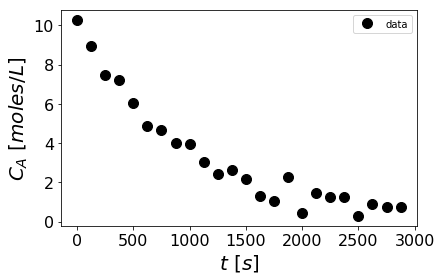

In [11]:
import numpy as np # our matlab-like module
import matplotlib.pyplot as plt # plotting modules
%matplotlib inline
plt.style.use('presentation') # just have in your script for prettier plotting
# if 'presentation' doesn't work use 'seaborn' or 'ggplot'

time_array = np.array([   0.,  125.,  250.,  375.,  500.,  625.,  750.,  875., 1000.,
       1125., 1250., 1375., 1500., 1625., 1750., 1875., 2000., 2125.,
       2250., 2375., 2500., 2625., 2750., 2875.])
       
C_A_array = np.array([10.28148623,  8.92676003,  7.47370739,  7.20498621,  6.01448975,
        4.85174028,  4.68868558,  4.01410753,  3.94055544,  3.04186757,
        2.40544184,  2.62290428,  2.18704979,  1.31502537,  1.03730156,
        2.28837979,  0.45062549,  1.43886825,  1.26808295,  1.24125421,
        0.28353151,  0.90117414,  0.74132173,  0.73710597])

plt.plot(time_array, C_A_array, 'ko', label='data') #  ko = black o (black circles)

plt.xlabel('$t\ [s]$') # we use $ $ to tell Python to use Latex you can just use plt.xlabel('t [s]')
plt.ylabel('$C_A\ [moles/L]$') # here the slash \ creates a space between C_A and [moles]
plt.legend() #brings up the legend
plt.savefig('problem1.png') #saving the graph
plt.show() # will show it below 

## How do we find k

Ok! Looks something like an exponent. That is a good sign. But how do we find the $k$ parameter????
Luckily, your friend have heard something about least squares method.

The idea is simple:

What if ... we take an arbitrary parameter $k = 0.01$ and see what it would give us? Lets see...



/Users/bazilevs/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


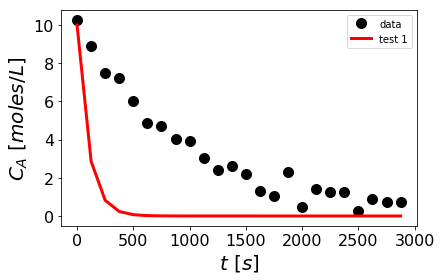

In [12]:

k_test_1 = 0.01
C_A_test_1_array = 10.*np.exp(-k_test_1*time_array) # this is our analytical solution

# our data
plt.plot(time_array, C_A_array, 'ko', label='data') #  ko = black o (black circles)
# first guess           
plt.plot(time_array, C_A_test_1_array, 'r-', label='test 1') #  r- = solid red line

plt.xlabel('$t\ [s]$') # we use $ $ to tell Python to use Latex you can just use plt.xlabel('t [s]')
plt.ylabel('$C_A\ [moles/L]$') # here the slash \ creates a space between C_A and [moles]
plt.legend()
# plt.show()

#lets see what we get:

As we can see the fit isn't that great! To know the exact value we can calculate the squared difference between each data point and our predicted curve (red curve and black data) and call this parameter $\chi^2$:

$$\chi^2 = \Sigma (data[i] - test[i])^2 =  \Sigma (black[i] - red[i])^2$$

If the $\chi^2$ parameter is really small then we have a good fitting. So the game of curve fitting becomes the game of selecting the parameter $k$ so it produces the smallest $\chi^2$ parameter.

Lets see what is it equal to:



In [13]:
# Lets go over each value of the both arrays and add the difference into the chi2 
chi2 = 0
for i in range(len(C_A_array)):
    chi2 = chi2 + (C_A_array[i] - C_A_test_1_array[i])**2
print('chi2 = {0}'.format(chi2))
# you can just use print(chi2) if you want. 
# chi2 = 284.0954414312236 - that is a lot!

chi2 = 284.08995409151896


After many iterations of choosing k we came to a better guess value $k = 0.001$. Lets try it out:

/Users/bazilevs/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


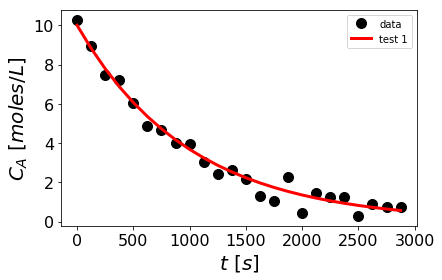

In [14]:

k_test_2 = 0.001
C_A_test_2_array = 10.*np.exp(-k_test_2*time_array) # this is our analytical solution

# our data
plt.plot(time_array, C_A_array, 'ko', label='data') #  ko = black o (black circles)
# first guess           
plt.plot(time_array, C_A_test_2_array, 'r-', label='test 1') #  r- = solid red line


plt.xlabel('$t\ [s]$') 
plt.ylabel('$C_A\ [moles/L]$') 

plt.legend()
plt.show()

#lets see what we get:

Wow! That is perfect! lets see what $\chi^2$ is equal to:


In [15]:
chi2 = 0
for i in range(len(C_A_array)):
    chi2 = chi2 + (C_A_array[i] - C_A_test_2_array[i])**2
print('chi2 = {0}'.format(chi2))

chi2 = 3.7755933932096144


Now it looks like something small - (and hence the graph looks to fit the data). In the ideal world of no random noises, $\chi^2=0$.

Now lets see how we can do the same thing using the stuff our friends from SciPy prepared for us:

## Solving everything using SciPY - easy to use fitting

/Users/bazilevs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


Huraah! our parameter k = [0.0010353]


/Users/bazilevs/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


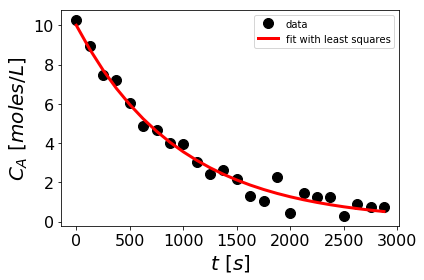

In [16]:
# step 0: importing all the jibber-jabber modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.optimize import curve_fit # this guy will help us fit everything

#step 1: define the function you want to fit:

def func(t, k):
    return 10. * np.exp(-k * t)


# step 2: define the arrays you want to fit

time_array = np.array([   0.,  125.,  250.,  375.,  500.,  625.,  750.,  875., 1000.,
       1125., 1250., 1375., 1500., 1625., 1750., 1875., 2000., 2125.,
       2250., 2375., 2500., 2625., 2750., 2875.])
       
C_A_array = np.array([10.28148623,  8.92676003,  7.47370739,  7.20498621,  6.01448975,
        4.85174028,  4.68868558,  4.01410753,  3.94055544,  3.04186757,
        2.40544184,  2.62290428,  2.18704979,  1.31502537,  1.03730156,
        2.28837979,  0.45062549,  1.43886825,  1.26808295,  1.24125421,
        0.28353151,  0.90117414,  0.74132173,  0.73710597])

# step 3 run the curve fitting:

popt, pcov = curve_fit(func, time_array, C_A_array, p0=(0.1))
# parameters optimized, parameters covariance matrix (we don't need it for now) = 
# curve_fit(our function, our x data, our y data, p0=(our initial guess for the parameters))

# step 4 print your parameters

print('Huraah! our parameter k = {0}'.format(popt))

# step 5 plot your results:

plt.plot(time_array, C_A_array, 'ko', label='data')
plt.plot(time_array, func(time_array, popt), 'r-', label='fit with least squares')
plt.xlabel('$t\ [s]$') 
plt.ylabel('$C_A\ [moles/L]$') 

plt.legend()
plt.show()

#step 6 report to your boss

Ok great! We have saved our company and we have found the paramter. 
We were also asked to find $C_A0$ which supposed to be around $\sim 10$. How do we do that? Ok, lets use our 6-step process:


/Users/bazilevs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


Huraah! our parameter C_A0 = 10.156458090006836, k = 0.0010522403405579899


/Users/bazilevs/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


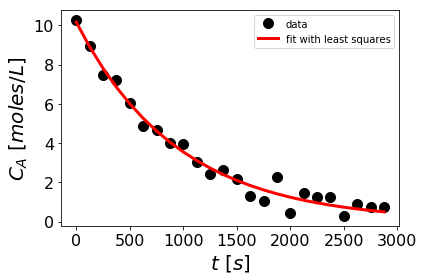

In [17]:
# step 0: importing all the jibber-jabber modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit # this guy will help us fit everything

#step 1: define the function you want to fit:

# here you can see I have two parameters, so the fitted popt will have two as well
def func(x, C_A0, k):
    return C_A0 * np.exp(-k * x)


# step 2: define the arrays you want to fit

time_array = np.array([   0.,  125.,  250.,  375.,  500.,  625.,  750.,  875., 1000.,
       1125., 1250., 1375., 1500., 1625., 1750., 1875., 2000., 2125.,
       2250., 2375., 2500., 2625., 2750., 2875.])
       
C_A_array = np.array([10.28148623,  8.92676003,  7.47370739,  7.20498621,  6.01448975,
        4.85174028,  4.68868558,  4.01410753,  3.94055544,  3.04186757,
        2.40544184,  2.62290428,  2.18704979,  1.31502537,  1.03730156,
        2.28837979,  0.45062549,  1.43886825,  1.26808295,  1.24125421,
        0.28353151,  0.90117414,  0.74132173,  0.73710597])

# step 3 run the curve fitting:

popt, pcov = curve_fit(func, time_array, C_A_array, p0=(8, 0.1))
# curve_fit(our function, our x data, our y data, p0=(our initial guesses for C_A0 and k))
# since from the graph we kind of see C_A0 is around 8-10

# step 4 print your parameters

print('Huraah! our parameter C_A0 = {0}, k = {1}'.format(popt[0], popt[1]))

# step 5 plot your results:

plt.plot(time_array, C_A_array, 'ko', label='data')
plt.plot(time_array, func(time_array, popt[0], popt[1]), 'r-', label='fit with least squares')
plt.xlabel('$t\ [s]$') 
plt.ylabel('$C_A\ [moles/L]$') 

plt.legend()
plt.show()

#step 6 report to your boss


Last remarks: there are 2 main things to consider when fitting the data:

_1_ What kind of model you are fitting your data with. Make sure you use your engineering 6-th sense for that

_2_ What kind of parameters we are expecting. So from plotting the data we can see that the half-life of our curve is around 1/500 seconds - so our initial parameter should be around 0.002. Sometimes hitting the right initial parameter could be really important!


## Problem 2:

Fitting another function:


$dC_A/dt = - k$

The exact solution here would be

$C_A =C_{A0} - kt$

Our Experimental data is:

```python
import numpy as np
time_array = np.array([ 0.        ,  0.30612245,  0.6122449 ,  0.91836735,  1.2244898 ,
        1.53061224,  1.83673469,  2.14285714,  2.44897959,  2.75510204,
        3.06122449,  3.36734694,  3.67346939,  3.97959184,  4.28571429,
        4.59183673,  4.89795918,  5.20408163,  5.51020408,  5.81632653,
        6.12244898,  6.42857143,  6.73469388,  7.04081633,  7.34693878,
        7.65306122,  7.95918367,  8.26530612,  8.57142857,  8.87755102,
        9.18367347,  9.48979592,  9.79591837, 10.10204082, 10.40816327,
       10.71428571, 11.02040816, 11.32653061, 11.63265306, 11.93877551,
       12.24489796, 12.55102041, 12.85714286, 13.16326531, 13.46938776,
       13.7755102 , 14.08163265, 14.3877551 , 14.69387755, 15.        ])

C_A_array = np.array([10.07639696,  9.91832079,  9.88786894,  9.86452614,  9.94122765,
        9.84390408,  9.67133   ,  9.83831594,  9.85882335,  9.80157275,
        9.84539316,  9.55091516,  9.61587477,  9.66549779,  9.49617392,
        9.55431562,  9.35852625,  9.49039332,  9.38783532,  9.44147304,
        9.40256963,  9.29987479,  9.14910022,  9.40193543,  9.15306236,
        9.35110886,  9.21753824,  9.04908686,  9.23874406,  9.02922114,
        9.01426505,  9.07687961,  9.03789781,  8.74373902,  8.93811106,
        8.89792648,  8.92497756,  8.9052101 ,  8.69154187,  8.83577787,
        8.6515694 ,  8.8865218 ,  8.43442155,  8.63970657,  8.5779596 ,
        8.6386648 ,  8.64805349,  8.37248495,  8.60161561,  8.64226331])
```



# Home work:


Your boss asked you to try another reaction and get parameters from there.

$$2A ->B$$

Your boss told you that it is probably a second order reaction $-r_A = k [C_A]^2$.

Your friend has helped you out with the design equation and the exact solution for the current system:

$dC_A/dt = r_A = -k C^2_A$

The exact solution here would be

$1/C_A = kt + 1/C_{A0}$

Your friend suggested that it would be better to plot $1/C_A$ instead of $C_A$. You think it is a great idea. Conveniently, your data is presented in the neccesseary format:

Time:

```python
time_array = array([ 0.        ,  0.41666667,  0.83333333,  1.25      ,  1.66666667,
        2.08333333,  2.5       ,  2.91666667,  3.33333333,  3.75      ,
        4.16666667,  4.58333333,  5.        ,  5.41666667,  5.83333333,
        6.25      ,  6.66666667,  7.08333333,  7.5       ,  7.91666667,
        8.33333333,  8.75      ,  9.16666667,  9.58333333, 10.        ])
```

and $1/C_A(time)$:

```python
CA_inv_array = array([0.09955774, 0.10041539, 0.10164106, 0.10040534, 0.10151214,
       0.1027833 , 0.10252228, 0.10259392, 0.10369246, 0.10371607,
       0.10400771, 0.10517007, 0.10549644, 0.10558765, 0.10639114,
       0.10600782, 0.10506377, 0.10734534, 0.10655902, 0.10820498,
       0.1077726 , 0.10985819, 0.10912644, 0.11053292, 0.10939707])
```

Your task is to find parameters $k$ and $C_A0$ from the experimental data.



## Bonus: How to make your data noisy or where did I get the data points above?

Let's say you want to practice these problems at home. How do you generate data to test your fitting skills?
Easy. The only thing you need to do is to generate a signal and add a random noise to it.

So lets say you want to test your algorithm on a linear curve:

y = k*x + b, where k and b are constants

/Users/bazilevs/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


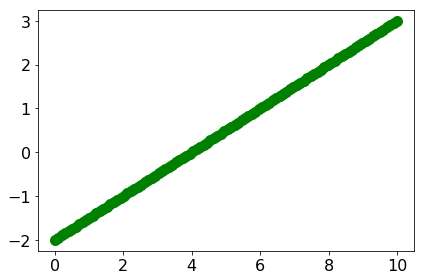

In [18]:
#step 1: define the function
def f(x, k, b):
    return x*k + b

#step 2: define the parameters
k = 0.5
b = -2
N_points = 100

#step 3: define arrays ( x_data and y_pure data )
x_data = np.linspace(0,10, N_points)

y_pure = f(x_data, k, b)

plt.plot(x_data, y_pure, 'go--')

/Users/bazilevs/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


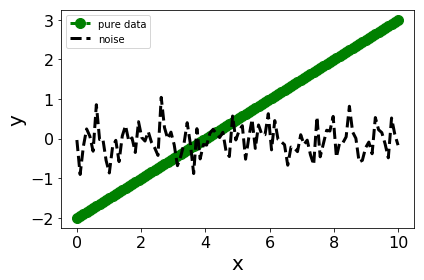

In [19]:
#Now lets add a bit of noise to it
plt.plot(x_data, y_pure, 'go--',label='pure data')

noise = 0.4*np.random.normal(0, 1, N_points) #0.4 - is how noisy is the data
#which looks like this:

plt.plot(x_data,noise,'k--',label='noise')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

/Users/bazilevs/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


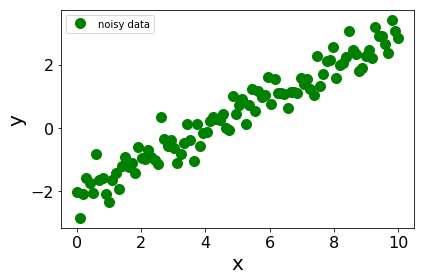

In [20]:
#so your resulting data will look like this:
y_noisy_data = y_pure + noise

plt.plot(x_data, y_noisy_data, 'go',label='noisy data')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

#voila!